In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
#in order to calculate pearson and spearman, import pearsonr and import spearmanr from scripy.stats
#generate 100 x-y value pairs from a standard normal distribution. Plot the x-y pairs and compute the covariance matrix

This is where the Insurance file analysis begins

In [3]:
from scipy.stats import pearsonr
#importing pearson correlation function

In [4]:
df = pd.read_csv(r'C:\Users\Kristian\Downloads\Insurance.csv')
#importing the data file

In [5]:
df.head()
#showing the head of the dataframe, just to see if it works

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [14]:
smokers_mean = df[df['smoker']=='yes']
print(smokers_mean)
                    

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
11     62  female  26.3         0    yes  southeast  27808.73
14     27    male  42.1         0    yes  southeast  39611.76
19     30    male  35.3         0    yes  southwest  36837.47
23     34  female  31.9         1    yes  northeast  37701.88
...   ...     ...   ...       ...    ...        ...       ...
1313   19  female  34.7         2    yes  southwest  36397.58
1314   30  female  23.7         3    yes  northwest  18765.88
1321   62    male  26.7         0    yes  northeast  28101.33
1323   42  female  40.4         2    yes  southeast  43896.38
1337   61  female  29.1         0    yes  northwest  29141.36

[274 rows x 7 columns]


## Making a Histogram for BMI groups and their average expenses

--> this is to visualize how the expenses move between different BMI groups

In [18]:
BMI = df.bmi.to_list() #moving column "BMI" from the dataframe to a list, to be able to create visualizations
Expenses = df.expenses.to_list() #moving column "Expenses" from the dataframe to a list, to be able to create visualizations

In [19]:
print(BMI)
print(Expenses)
#BMI ranges = <18.5 --> Underweight; 18.5-24.9 --> Healthy; 25.0 - 29.9 --> Overweight; 30.0 + --> Obese

[27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2, 26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36.0, 32.4, 34.1, 31.9, 28.0, 27.7, 23.1, 32.8, 17.4, 36.3, 35.6, 26.3, 28.6, 28.3, 36.4, 20.4, 33.0, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 30.8, 37.1, 37.3, 38.7, 34.8, 24.5, 35.2, 35.6, 33.6, 28.0, 34.4, 28.7, 37.0, 31.8, 31.7, 22.9, 37.3, 27.4, 33.7, 24.7, 25.9, 22.4, 28.9, 39.1, 26.3, 36.2, 24.0, 24.8, 28.5, 28.1, 32.0, 27.4, 34.0, 29.6, 35.5, 39.8, 33.0, 26.9, 38.3, 37.6, 41.2, 34.8, 22.9, 31.2, 27.2, 27.7, 27.0, 39.5, 24.8, 29.8, 34.8, 31.3, 37.6, 30.8, 38.3, 20.0, 19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.0, 28.4, 30.9, 27.9, 35.1, 33.6, 29.7, 30.8, 35.7, 32.2, 28.6, 49.1, 27.9, 27.2, 23.4, 37.1, 23.8, 29.0, 31.4, 33.9, 28.8, 28.3, 37.4, 17.8, 34.7, 26.5, 22.0, 35.9, 25.6, 28.8, 28.1, 34.1, 25.2, 31.9, 36.0, 22.4, 32.5, 25.3, 29.7, 28.7, 38.8, 30.5, 37.7, 37.4, 28.4, 24.1, 29.7, 37.1, 23.4, 25.5, 39.5, 24.4, 25.2, 35.5, 27.8, 26.6, 36.9, 39.6, 29.8, 29.6, 28.2, 37.

In [20]:
BMI_groups = {
    '0-18.5': (0,18.5), #underweight range
    '18.51-25': (18.51,25), #normal weight range
    '25.01-29.99': (25.01,29.99), #overweight range 
    '30.0 - 34.99': (30,34.99), #obesity range
    '35.0 and above':(35, float('inf')) #severe obesity range
}

#creating groups for each BMI level

In [21]:
#calculating mean insurance expenses for each BMI group

for BMI_group, (min_BMI, max_BMI) in BMI_groups.items(): 
    mean_expenses = df[(df['bmi']>=min_BMI) & (df['bmi']<=max_BMI)]['expenses'].mean()
    print(f"Mean Expenses for {BMI_group}: {mean_expenses:.2f}")


Mean Expenses for 0-18.5: 8657.62
Mean Expenses for 18.51-25: 10435.44
Mean Expenses for 25.01-29.99: 10989.85
Mean Expenses for 30.0 - 34.99: 14298.84
Mean Expenses for 35.0 and above: 17076.96


In [41]:
print(BMI_groups)

{'0-18.5': (0, 18.5), '18.51-25': (18.51, 25), '25.01-29.99': (25.01, 29.99), '30.0 - 34.99': (30, 34.99), '35.0 and above': (35, inf)}


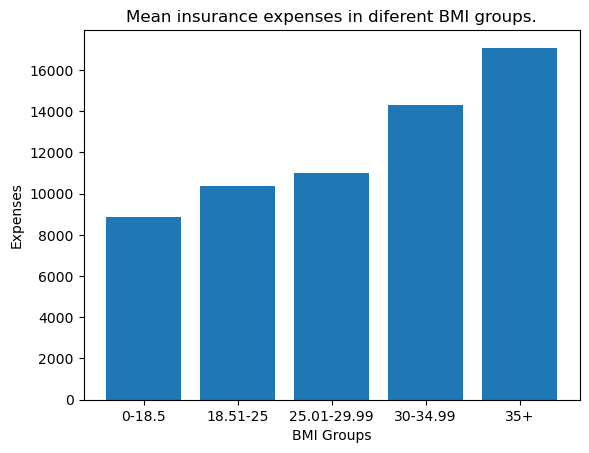

In [22]:
#defining BMI bins for bar chart

BMI_bins = [0, 18.5, 25, 30, 35, 100] #bin for each
BMI_labels = ['0-18.5','18.51-25','25.01-29.99','30-34.99','35+']
#creating BMI group based on labels and BMI bins
df['BMIGroup'] = pd.cut(df['bmi'],bins=BMI_bins,labels = BMI_labels, right=False)
#calculating mean expenses by BMI group again
mean_expenses_by_age_group = df.groupby('BMIGroup')['expenses'].mean()
#creating a bar chart
plt.bar(mean_expenses_by_age_group.index, mean_expenses_by_age_group)
plt.xlabel("BMI Groups")
plt.ylabel("Expenses")
plt.title('Mean insurance expenses in diferent BMI groups.')
plt.show()

Already from this bar chart, we start seeing there is a significant effect of the rising BMI tendency on the expenses. In this bar chart, it is clear that the higher the BMI, the higher the expenses.

## Conducting a T-test

In [24]:
t_stat, p_value = stats.ttest_ind(Expenses, BMI)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, BMI has an effect on insurance expenses.")
else: 
    print("Null hypothesis not rejected.")
#this shows there is indeed a relationship

1.5385809471468848e-274
Reject the null hypothesis, BMI has an effect on insurance expenses.


## Conducting a Correlation Coefficient

In [25]:
correlation_coefficient = df['bmi'].corr(df['expenses'])
#calculating correlation between bmi and expense

In [26]:
print("Pearson's correlation coefficient between bmi and expenses: ",correlation_coefficient)
#correlation between bmi and expenses. This however shows that the relationship is not that strong. That does not mean it is not significant

Pearson's correlation coefficient between bmi and expenses:  0.198576255018932


## Plotting the data in a box plot

Text(0, 0.5, 'Expenses')

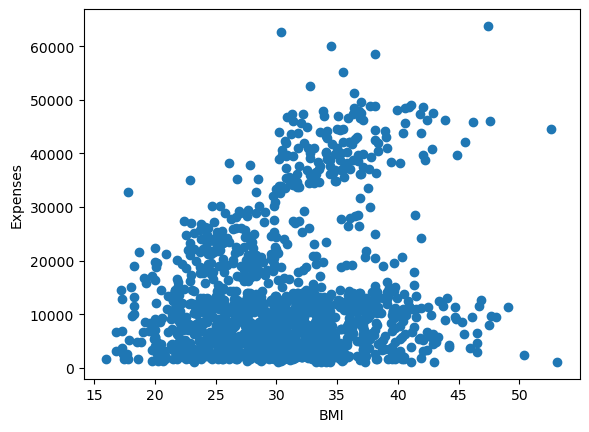

In [27]:
plt.scatter(BMI, Expenses)
plt.xlabel("BMI")
plt.ylabel("Expenses")
#creation of a scatter plot,

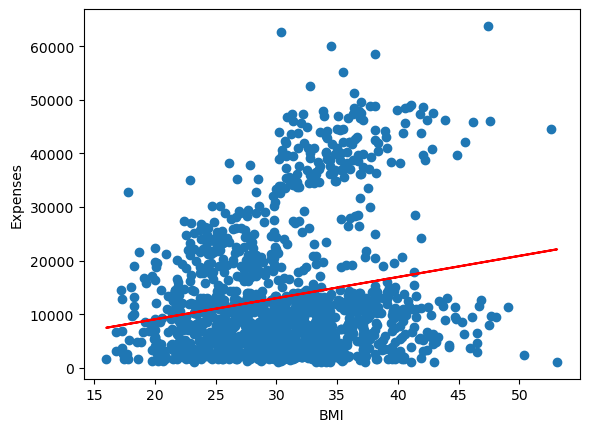

In [58]:
coefficients = np.polyfit(BMI,Expenses, 1)
poly = np.poly1d(coefficients)
plt.scatter(BMI, Expenses)
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.plot(BMI,poly(BMI),color = 'red', label = 'Regression line')

Based on the graph above, we clearly see how dispersed the data is from the mean, but we also see a clear increasing tendency, meaning that as BMI rises, the expenses rise as well.

In [28]:
average_bmi = np.mean(BMI)
average_expenses = np.mean(Expenses)
print("Average BMI for a person within this data set is equal to: ",average_bmi)
print("Average Expenses for a person within this data set is equal to: ",average_expenses)

#to see where exactly the means are on the graph

Average BMI for a person within this data set is equal to:  30.66547085201794
Average Expenses for a person within this data set is equal to:  13270.422414050823


In [46]:
grouped_data = []

#creating an empty tuple in order to be able to group data based on increasing BMI

# Kruskal Wallis H test

For ordinal variables. One can argue BMI is ordinal as well as it can be order from best to worst.

In [50]:
for group, BMI_range in BMI_groups.items():
    group_data = df[(df['bmi']>=BMI_range[0])&(df['bmi']<=BMI_range[1])]['expenses']
    grouped_data.append(group_data)

#grouping the data based on the different levels of BMI which are defined above. 

In [52]:
alpha = 0.05
test_stat, p_val = stats.kruskal(BMI,Expenses)
print('The p-value for Kruskal-Wallis H test is:', p_val)
print("Reject the null hypothesis, value is less than alpha. Population means of the different groups are not equal, therefore BMI has an effect on insurance expenses.")

The p-value for Kruskal-Wallis H test is: 0.0
Reject the null hypothesis, value is less than alpha. Population means of the different groups are not equal, therefore BMI has an effect on insurance expenses.


## ANOVA Test

to compare means of independent groups. Independent groups in this case are the different BMI groups.

In [53]:
#Performing ANOVA

f_statistic, p_value = f_statistic, p_value = stats.f_oneway(*grouped_data)
alpha = 0.05

#data is normally distributed, data is independent (BMI groups VS expenses), (three or more categorical data = different levels of BMI, 4 different categories) 

In [54]:
#Printing results from the above ANOVA test

print("One-way ANOVA Test")
print(f'F-statistic:{f_statistic:.2f}')
print(f'p-value:{p_value:.4f}')

if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis Ha = BMI has an effect on insurance expenses.")
else: 
    print("Failing to reject the null hypothesis, BMI doest not have an effect on insurance expenses.")

One-way ANOVA Test
F-statistic:14.21
p-value:0.0000
There is significant evidence to reject the null hypothesis Ha = BMI has an effect on insurance expenses.
